Import Both input and response file

In [25]:
#!pip install pandas
import pandas as pd
pd.set_option('display.max_rows', None)
df_input = pd.read_csv('example_explanatory_variables.csv')
df_output = pd.read_csv('example_response_variable.csv')
X = df_input
y= df_output['V1']
print(X)

     Size Lipid  Orientation Backbone  PeptideDensity OligoDensity Attachment  \
0      50  100%            3       PO            0.00          Low       Chol   
1      80  100%            3       PO            0.00          Low       Chol   
2      50  100%            3       PO            0.05          Low       Chol   
3      80  100%            3       PO            0.05          Low       Chol   
4      50  100%            3       PO            0.50          Low       Chol   
5      80  100%            3       PO            0.50          Low       Chol   
6      50   80%            3       PO            0.00          Low       Chol   
7      80   80%            3       PO            0.00          Low       Chol   
8      50   80%            3       PO            0.05          Low       Chol   
9      80   80%            3       PO            0.05          Low       Chol   
10     50   80%            3       PO            0.50          Low       Chol   
11     80   80%            3

Replace elements

In [2]:
X['Orientation'] = X.Orientation.astype(str)
Ori = pd.get_dummies(X.Orientation)
X = X.join(Ori)
X.dtypes 
X = X.drop('Orientation' ,axis = 1)

Bk = pd.get_dummies(X.Backbone)
X = X.join(Bk)
X = X.drop('Backbone', axis = 1 )

OD = pd.get_dummies(X.OligoDensity)
X = X.join(OD, how='right')
X = X.drop('OligoDensity', axis = 1)

AT = pd.get_dummies(X.Attachment)
X = X.join(AT)
X = X.drop('Attachment', axis = 1)

#X.loc[(X.Lipid == '100%'), 'Lipid' ] = 1
#X.loc[(X.Lipid == '80%'), 'Lipid' ] = 0.8

X['Size'] = X.Size.astype(str)
Si = pd.get_dummies(X.Size)
X = X.join(Si)
X = X.drop('Size' ,axis = 1)

X['Lipid'] = X.Lipid.astype(str)
Li = pd.get_dummies(X.Lipid)
X = X.join(Li) 
X = X.drop('Lipid' ,axis = 1)

#X['OligoConc'] = X.OligoConc.astype(str)
#OC = pd.get_dummies(X.OligoConc)
#X = X.join(OC) 
#X = X.drop('OligoConc' ,axis = 1)

X['PeptideDensity'] = X.PeptideDensity.astype(str)
PD = pd.get_dummies(X.PeptideDensity)
X = X.join(PD) 
X = X.drop('PeptideDensity' ,axis = 1)
#print(X)

#X = X[['1','10','100','1000','Chol','DOPE','PO','PS','3','5','High' ,'Low', 'VHigh','PeptideDensity','100%','80%','Size']]
X = X[['High' ,'Low', 'VHigh','Chol','DOPE','OligoConc','PO','PS','0.0','0.05','0.5','80%','100%','50','80','3','5']]
#'1','10','100','1000',,'0.0','0.05','0.5','80%','100%','50','80'
print(X.head(10))

   High  Low  VHigh  Chol  DOPE  OligoConc  PO  PS  0.0  0.05  0.5  80%  100%  \
0     0    1      0     1     0          1   1   0    1     0    0    0     1   
1     0    1      0     1     0          1   1   0    1     0    0    0     1   
2     0    1      0     1     0          1   1   0    0     1    0    0     1   
3     0    1      0     1     0          1   1   0    0     1    0    0     1   
4     0    1      0     1     0          1   1   0    0     0    1    0     1   
5     0    1      0     1     0          1   1   0    0     0    1    0     1   
6     0    1      0     1     0          1   1   0    1     0    0    1     0   
7     0    1      0     1     0          1   1   0    1     0    0    1     0   
8     0    1      0     1     0          1   1   0    0     1    0    1     0   
9     0    1      0     1     0          1   1   0    0     1    0    1     0   

   50  80  3  5  
0   1   0  1  0  
1   0   1  1  0  
2   1   0  1  0  
3   0   1  1  0  
4   1   0  1  0  


In [3]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [4]:
print(regr.coef_)

[  1.48264132   8.7866066  -10.26924792  72.36682682 -72.36682682
   0.45993136 -26.52593735  26.52593735   3.91997336   2.85535461
  -6.77532798  -0.95587865   0.95587865  -2.15687961   2.15687961
 -25.52337485  25.52337485]


In [5]:
Pred = regr.predict(X)

0.5947729305542111
(672,)

MAE is  144.31326425952307


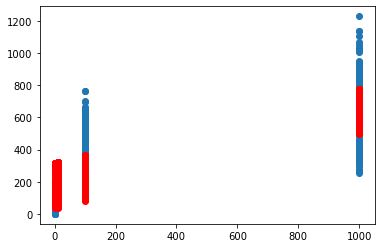

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statistics
import numpy as np
plt.scatter(X['OligoConc'],y)
plt.scatter(X['OligoConc'],Pred,c = "red")
print(r2_score(y,Pred))
print(np.shape(Pred))
print('\nMAE is ',mean_absolute_error(y ,Pred))

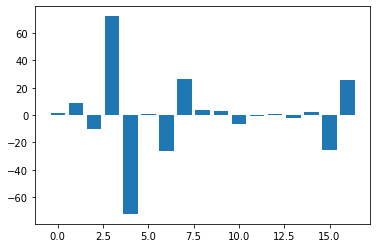

[  1.48264132   8.7866066  -10.26924792  72.36682682 -72.36682682
   0.45993136 -26.52593735  26.52593735   3.91997336   2.85535461
  -6.77532798  -0.95587865   0.95587865  -2.15687961   2.15687961
 -25.52337485  25.52337485]


In [7]:
importance = regr.coef_
X_import = [x for x in range(len(importance))]
plt.bar(X_import, importance.reshape(-1,))
plt.show()
print(importance.reshape(-1,))

K-fold cross-validation to get Q2 value (k-folds = 5)

In [8]:
import warnings
import math
import numpy
def getQ2(test_pred, test_res, rand_res): 

# this function calculates Q2 values

  # set up squared total error and squared residual error
    SS_tot = 0
    SS_res = 0
  
    # continuous variable
      # accumulate errors
    SS_tot = SS_tot + sum(numpy.square(numpy.subtract(test_res,rand_res)))
    SS_res = SS_res + sum(numpy.square(numpy.subtract(test_res,test_pred)))
    
  # do final Q2 calculation
    Q2 = 1 - SS_res / SS_tot
    #Q2 = 1 - (Sum(real-predict)/Sum(real-predict_group_mean))
  # something went wrong and there was NA (rare)
    if math.isnan(Q2) or pd.isna(Q2):
        Q2 = 0
        warn("Q2 in Q2.R created nan")
    return(Q2)

[0.6223160282087299, 0.6197938406539367, 0.6340258188437444, 0.6211322372117987, 0.6198055970715142]
[0.0019448132099454617, 0.06535732891789273, 0.6234668677475368, 0.629333931920341, 0.6281112239606197, 0.6251346729437902, 0.6251346729437903, 0.6234147043979448]


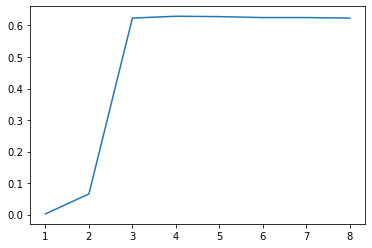

In [9]:
from sklearn.model_selection import KFold, train_test_split
import statistics as statss
kf = KFold(n_splits=5) #, shuffle = True
kf.get_n_splits(X)
regrt = linear_model.LinearRegression()
Q2=[]
z=0

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)

for p in range(8):
    z=z+1
    CVX = X.iloc[:, 0:z].copy()
    if CVX.columns[len(CVX.columns)-1] == '3' or CVX.columns[len(CVX.columns)-1] == 'PO' or CVX.columns[len(CVX.columns)-1] == 'Chol'or CVX.columns[len(CVX.columns)-1] == '100%':
        z=z+1
        CVX = X.iloc[:, 0:z].copy()
    elif CVX.columns[len(CVX.columns)-1] == 'High':
        z=z+2 
        CVX = X.iloc[:, 0:z].copy()
    elif CVX.columns[len(CVX.columns)-1] == '1':
        z=z+3
        CVX = X.iloc[:, 0:z].copy()
    X_test_tem = X_test.iloc[:, 0:z].copy()
    y_test_tem = y_test

#CVX = Xt.copy()
    CVy = y.copy()
    Q2infold = []
    for train_index, test_index in kf.split(X):
        Test_pred = [] #predicted values
        Test_res = []  #original values
        rand_res = []  #training set mean values
        
        #print("TRAIN:", train_index, "TEST:", test_index)
        trainX , trainY = CVX.iloc[train_index] , CVy.iloc[train_index]
        testX , testY =  CVX.iloc[test_index] , CVy.iloc[test_index]
        #print(trainY)
        regrt.fit(trainX, trainY)
        Pred_test = regrt.predict(X_test_tem)#testX
        Mean_trained_y=statss.mean(trainY)
        for x in range(len(Pred_test)):
            rand_res.append(Mean_trained_y)
        Test_pred.extend(Pred_test)
        Test_res.extend(y_test_tem)#testY
        
    #print(trainX.head(2))
        Q2infold.append(getQ2(Test_pred,Test_res,rand_res))
    Q2.append(np.mean(Q2infold))
print(Q2infold)
plt.plot([1,2,3,4,5,6,7,8],Q2)
print(Q2)
plt.show()


NameError: name 'log_pred' is not defined

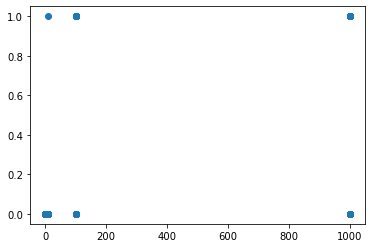

In [10]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit, logit
#clf = LogisticRegression(random_state=10)
log_y = y.copy()
mean_y = statss.mean(log_y)
a = numpy.array(log_y.values.tolist())
log_y = numpy.where(a >= mean_y, 1, 0).tolist()
log_x = X[['OligoConc','Chol','DOPE','PO','PS','3','5','High' ,'Low', 'VHigh','0.0','0.05','0.5','100%','80%']]#Size
#log_x = X[['100%','80%','3','5','High' ,'Low', 'VHigh','PeptideDensity','PO','PS','Chol','DOPE','1','10','100','1000']]
#clf.fit(log_x, log_y)
#log_pred = clf.predict(log_x.head(100))

def sigmoid(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15, a, b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15):
    y = 1 / (1 + expit(-(b1*x1+b2*x2+b3*x3+b4*x4+b5*x5+b6*x6+b7*x7+b8*x8+b9*x9+b10*x10+b11*x11+b12*x12+b13*x13+b14*x14-a)))
    return y

from scipy.optimize import curve_fit

plt.scatter(log_x['OligoConc'],log_y)
plt.scatter(log_x['OligoConc'].head(100),log_pred,c = "red")
print(clf.intercept_)
plotX = numpy.linspace(0,1,200)
loss = expit(plotX * clf.coef_[0][1] + clf.intercept_).ravel()
plt.plot(plotX, loss, color="red", linewidth=3)
plt.show()

print(log_x)
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(clf, log_x, log_y, values_format = 'd' , display_labels =['Did not leave', "left"])

In [ ]:
Q2Log=[]
zL=0
clft = LogisticRegression(random_state=10)
for p in range(8):
    zL=zL+1
    CVXL = log_x.iloc[:, 0:zL].copy()
    if CVXL.columns[len(CVXL.columns)-1] == '3' or CVXL.columns[len(CVXL.columns)-1] == 'PO' or CVXL.columns[len(CVXL.columns)-1] == 'Chol'or CVXL.columns[len(CVXL.columns)-1] == '100%':
        zL=zL+1
        CVXL = log_x.iloc[:, 0:zL].copy()
    elif CVXL.columns[len(CVXL.columns)-1] == 'High':
        zL=zL+2 
        CVXL = log_x.iloc[:, 0:zL].copy()
    elif CVXL.columns[len(CVXL.columns)-1] == '1':
        zL=zL+3
        CVXL = log_x.iloc[:, 0:zL].copy()

    #print(CVXL.head(2))
#CVX = Xt.copy()
    CVyL = pd.DataFrame(log_y).copy()
    Test_predL = [] #predicted values
    Test_resL = []  #original values
    rand_resL = []  #training set mean values
    for train_index, test_index in kf.split(X):
        trainX , trainY = CVXL.iloc[train_index] , CVyL.iloc[train_index]
        testX , testY =  CVXL.iloc[test_index] , CVyL.iloc[test_index]
        clft.fit(trainX, trainY.values.ravel())
        Pred_test = clft.predict(testX)
        Mean_trained_y=statss.mean(trainY.values.ravel())
        for x in range(len(Pred_test)):
            rand_resL.append(Mean_trained_y)
        Test_predL.extend(Pred_test.ravel())
        Test_resL.extend(testY.values.ravel())

    #print(Test_predL)
    Q2Log.append(getQ2(Test_predL,Test_resL,rand_resL))
print(Q2Log)
plt.plot([1,2,3,4,5,6,7,8],Q2Log)
plt.show()

Size              category
Lipid             category
Orientation       category
Backbone          category
PeptideDensity    category
OligoDensity      category
Attachment        category
OligoConc            int64
dtype: object
    Size Lipid Orientation Backbone PeptideDensity OligoDensity Attachment  \
0     50  100%           3       PO           0.00          Low       Chol   
1     80  100%           3       PO           0.00          Low       Chol   
2     50  100%           3       PO           0.05          Low       Chol   
3     80  100%           3       PO           0.05          Low       Chol   
4     50  100%           3       PO           0.50          Low       Chol   
5     80  100%           3       PO           0.50          Low       Chol   
6     50   80%           3       PO           0.00          Low       Chol   
7     80   80%           3       PO           0.00          Low       Chol   
8     50   80%           3       PO           0.05          Low     

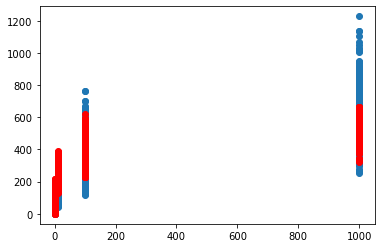


MAE is  7.122227467818274
332.2184 192.86542
(672,)


In [26]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
le = LabelEncoder()
y_train_XGBoost = le.fit_transform(y)

xgbc = xgb.XGBRegressor(tree_method="hist", enable_categorical=True, eval_metric = mean_absolute_error)#tree_method="gpu_hist"#enable_categorical=True

df_inBoost =  df_input.copy()
df_inBoost['Orientation'] = df_inBoost['Orientation'].astype("category")
df_inBoost['Backbone'] = df_inBoost['Backbone'].astype("category")
df_inBoost['OligoDensity'] = df_inBoost['OligoDensity'].astype("category")
df_inBoost['Attachment'] = df_inBoost['Attachment'].astype("category")
df_inBoost['Lipid'] = df_inBoost['Lipid'].astype("category")
df_inBoost['Size'] = df_inBoost['Size'].astype("category")
df_inBoost['PeptideDensity'] = df_inBoost['PeptideDensity'].astype("category")
#df_inBoost['OligoConc'] = df_inBoost['OligoConc'].astype("category")
print(df_inBoost.dtypes)

print(df_inBoost)
xgbc.fit(df_inBoost,y_train_XGBoost.ravel())
Pred_XGB = xgbc.predict(df_inBoost)
plt.scatter(df_inBoost['OligoConc'],y)
#print(Pred_XGB)
plt.scatter(df_inBoost['OligoConc'],Pred_XGB,c = "red")
plt.show()
print('\nMAE is ',mean_absolute_error(y_train_XGBoost ,Pred_XGB))

print(statss.mean(Pred_XGB),np.std(Pred_XGB))

print(np.shape(Pred_XGB))

Q2 function for XGBoost

0
0.8147625153513484
1


C:\Users\kenll\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.828522469013205
2
0.7818459951961632
3
0.7933565191290163
4
0.8099402043143472
[0.8147625153513484, 0.828522469013205, 0.7818459951961632, 0.7933565191290163, 0.8099402043143472]
[0.8056855406008159]


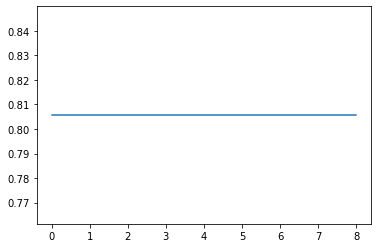

In [19]:
from sklearn.metrics import mean_absolute_error
Q2Boost=[]
zB=0
xgbt = xgb.XGBRegressor()#tree_method="hist",,enable_categorical=True, 
zB=8
    #zB=zB+1
    #CVXB = df_inBoost.iloc[:, 0:zB].copy()
    #if CVXB.columns[len(CVXB.columns)-1] == '3' or CVXB.columns[len(CVXB.columns)-1] == 'PO' or CVXB.columns[len(CVXB.columns)-1] == 'Chol'or CVXB.columns[len(CVXB.columns)-1] == '100%':
        #zB=zB+1
        #CVXB = df_inBoost.iloc[:, 0:zB].copy()
    #elif CVXB.columns[len(CVXB.columns)-1] == 'High':
        #zB=zB+2 
        #CVXB = df_inBoost.iloc[:, 0:zB].copy()
    #elif CVXB.columns[len(CVXB.columns)-1] == '1':
        #zB=zB+3
        #CVXB = df_inBoost.iloc[:, 0:zB].copy()

    #print(CVXL.head(2))
CVXB = X.copy()
CVyB = pd.DataFrame(y_train_XGBoost).copy()

kf = KFold(n_splits=5,shuffle = True) #, shuffle = True
kf.get_n_splits(CVXB)
u=0
Q2infold = []
for train_index, test_index in kf.split(CVXB):
    Test_predB = [] #predicted values
    Test_resB = []  #original values
    rand_resB = []  #training set mean values
    
    print(u)
    u=u+1
    trainX , trainY = CVXB.iloc[train_index] , CVyB.iloc[train_index]
    testX , testY =  CVXB.iloc[test_index] , CVyB.iloc[test_index]
    xgbt.fit(trainX, le.fit_transform(trainY).ravel())
    Pred_test = xgbt.predict(testX)#testX
    Mean_trained_y=statss.mean(testY.values.ravel())#trainY
    for x in range(len(Pred_test)):
        rand_resB.append(Mean_trained_y)
    Test_predB.extend(Pred_test.ravel())
    Test_resB.extend(testY.values.ravel())#testY
    Q2infold.append(getQ2(Test_predB,Test_resB,rand_resB))
    print(getQ2(Test_predB,Test_resB,rand_resB))
Q2Boost.append(np.mean(Q2infold))
print(Q2infold)
#Q2Boost.append(getQ2(Test_predB,Test_resB,rand_resB))
print(Q2Boost)
plt.plot([0,8],[Q2Boost,Q2Boost])
plt.show()

In [ ]:
#get importance
importanceXG = xgbt.feature_importances_
#summarize
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' %(i,v))
#plot feature importance
plt.bar([x for x in range(len(importanceXG))], importanceXG)
plt.show()